In [76]:
from dolo import *
from matplotlib import pyplot as plt 

In [77]:
model = yaml_import("../models/bufferstock.yaml")

In [78]:
dr = time_iteration(model)

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  8.900e-01 |      nan |    0.879 |   5 |
|   2 |  2.511e-02 |    0.028 |    0.645 |   4 |
|   3 |  2.564e-02 |    1.021 |    0.681 |   5 |
|   4 |  2.623e-02 |    1.023 |    0.779 |   4 |
|   5 |  2.684e-02 |    1.023 |    0.639 |   4 |
|   6 |  2.747e-02 |    1.023 |    0.606 |   4 |
|   7 |  2.811e-02 |    1.023 |    0.823 |   4 |
|   8 |  2.877e-02 |    1.023 |    0.682 |   4 |
|   9 |  2.944e-02 |    1.023 |    0.623 |   4 |
|  10 |  3.013e-02 |    1.023 |    0.743 |   4 |
|  11 |  3.083e-02 |    1.023 |    0.452 |   3 |
|  12 |  3.155e-02 |    1.023 |    0.473 |   3 |
|  13 |  3.229e-02 |    1.023 |    0.445 |   3 |
|  14 |  3.305e-02 |    1.023 |    0.659 |   3 |
|  15 |  3.382e-02 |    1.023 |    0.498 |   3 |
|  16 |  3.461e-02 |    1.023 |    0.471 |   3 |
|  17 |  3.542e-02 |    1.023 |    0.

One can also try the faster version

In [65]:
dr

## Stochastic Simulations

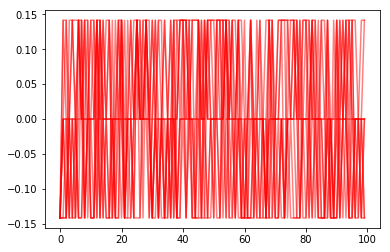

In [87]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [88]:
sim = simulate(model, dr, i0=1, N=100)

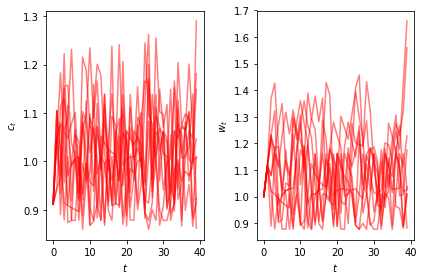

In [89]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='m'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [90]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

Text(0.5, 0, '$m$')

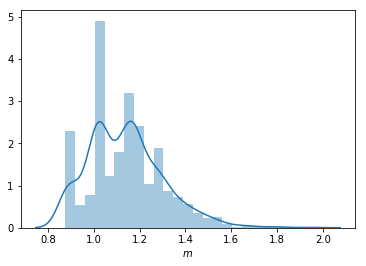

In [91]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='m'))
plt.xlabel("$m$")

## Plotting Decision Rule

In [92]:
tab = tabulate(model, dr,'m')

In [93]:
from matplotlib import pyplot as plt

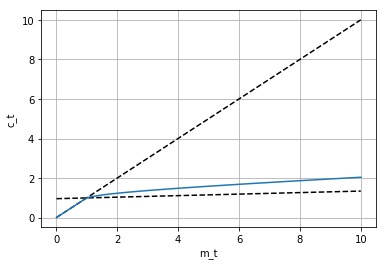

In [94]:
stable_wealth = model.eval_formula('1/R+(1-1/R)*m(0)', tab)
plt.plot(tab['m'], tab['m'],color='black', linestyle='--')
plt.plot(tab['m'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['m'], tab['c'])
plt.xlabel("m_t")
plt.ylabel("c_t")
plt.grid()